# Machine Learning 2 Assignment
### Submitted By Shaikh Muhammad Asjad Raza

In [19]:
import numpy as np
import pandas as pd
import math
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline
import itertools  
# Population size
N = 1000

# Initial conditions: 1 Infected, no Recovered individuals, no deaths
I0, R0, D0 = 3, 0, 0 #case zero

# All others, S=N-I-R susceptible, initially S0=N-I0-R0
S0 = N - I0 - R0 #normalization

# Contact rate, beta; recovery rate, gamma; death rate, mu
beta, gamma, mu = 0.4, 0.035, 0.005

# Basic reproduction number R0 (speak R nought), average number of individuals that get infected over
# the period where an infected person is infectious at time 0 where no one is infected 
#R_nought = beta / (gamma + mu)

print("Population size", N)
print("Infected at t=0", I0)
#print ("R0=",R_nought)


Population size 1000
Infected at t=0 3


### R_nought = beta / (gamma + mu)

In [20]:
def deriv(y, t, N, beta, gamma, mu):
    S, I, R, D = y
    dSdt = -beta * S * I / N
    dIdt = I * ((beta * S / N) - gamma - mu)
    dRdt = gamma * I
    dDdt = mu * I
    return dSdt, dIdt, dRdt, dDdt

In [21]:
# A grid of time points (in days)
t = np.linspace(0, 150,150)
# Initial conditions vector
y0 = S0, I0, R0, D0
# Integrate the SIRD equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, mu))
S, I, R, D = ret.T # return vector

In [22]:
#convert number of infected to integer
#data = I[0:50].astype(int)
data = I.astype(int)
data = np.trim_zeros(data) #remove all leading and trailing zeros from data
print(data)# display the infected individuals in numbers
data.shape

[  3   4   6   8  12  18  25  36  51  71  99 135 180 236 300 370 440 506
 562 607 639 659 668 669 663 653 639 622 605 586 567 547 528 509 490 472
 454 437 420 404 389 374 359 345 332 319 306 294 283 272 261 251 241 231
 222 213 205 197 189 182 175 168 161 155 149 143 137 132 126 121 117 112
 108 103  99  95  92  88  84  81  78  75  72  69  66  64  61  59  56  54
  52  50  48  46  44  42  41  39  37  36  35  33  32  31  29  28  27  26
  25  24  23  22  21  20  19  19  18  17  16  16  15  15  14  13  13  12
  12  11  11  10  10  10   9   9   8   8   8   7   7   7   7   6   6   6
   5   5   5   5   5   4]


(150,)

In [23]:
def plot_SIRD(S, I, R, D, t):
    # Plot the data on three separate curves for S(t), I(t) and R(t)
    fig = plt.figure(facecolor='w', figsize=(12, 6))
    fig.suptitle('SIRD  Model with beta = ' + str(beta),  fontsize=14, fontweight='bold')
    #plt.title('x= '+str(x)+', y = '+str(y))
    ax = fig.add_subplot(111, axisbelow=True)
    ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='S/usceptible')
    ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='I/nfected')
    ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='R/ecovered')
    ax.plot(t, D/N, 'y', alpha=0.5, lw=2, label='D/eaths')

    ax.set_xlabel('Time / days')
    ax.set_ylabel('Fraction')
    ax.set_ylim(0,1.1)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)

plt.show()
    

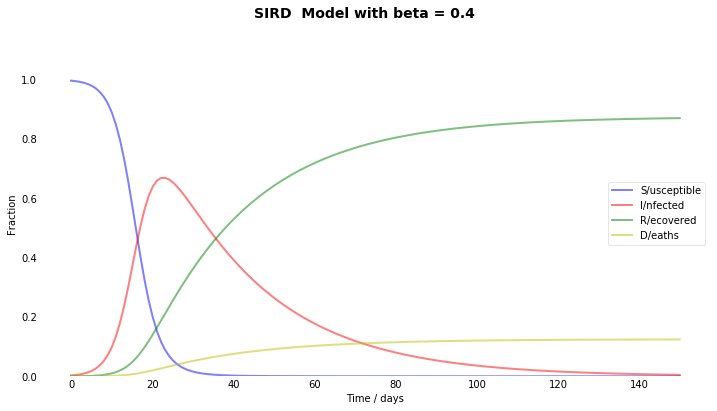

In [24]:
plot_SIRD(S, I, R, D, t)

# (c) Study numerically the effects of lockdowns (by varying β), where the focus is on D(t), in particular for t → ∞

In [25]:
def plot_SIRD(S, I, R, D, t, m_d, t_d, b):
    # Plot the data on three separate curves for S(t), I(t) and R(t)
    fig = plt.figure(facecolor='w')
    fig.suptitle('SIRD  Model with beta = ' 
                 + str(b)+
                 ', max deaths: '+
                 str(m_d)+
                 ' in '+
                 str(t_d)+
                 ' days', 
                 fontsize=14, 
                 fontweight='bold')

    ax = fig.add_subplot(111, axisbelow=True)
    ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='S/usceptible')
    ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='I/nfected')
    ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='R/ecovered')
    ax.plot(t, D/N, 'y', alpha=0.5, lw=2, label='D/eaths')

    ax.set_xlabel('Time / days')
    ax.set_ylabel('Fraction')
    ax.set_ylim(0,1.1)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)

plt.show()

In [26]:
t = np.linspace(0, 700, 700)
beta = np.array([0.05,0.1, 0.15, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

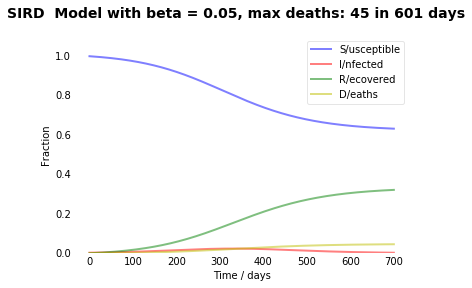

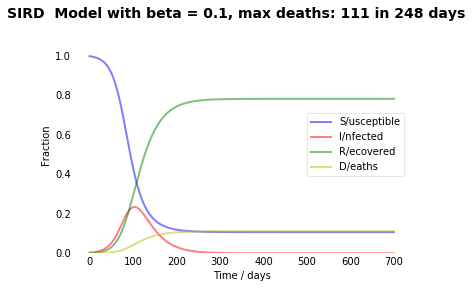

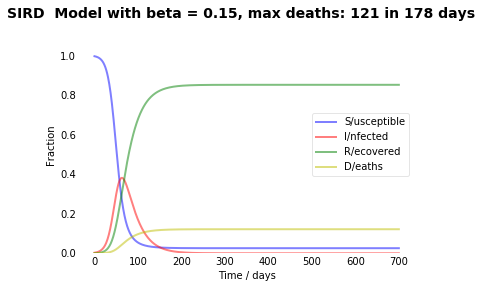

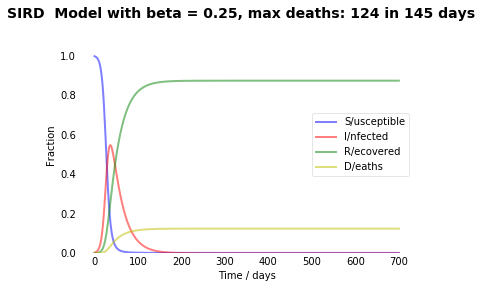

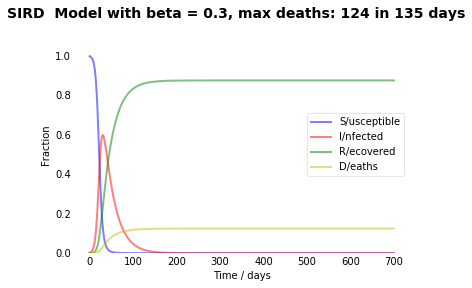

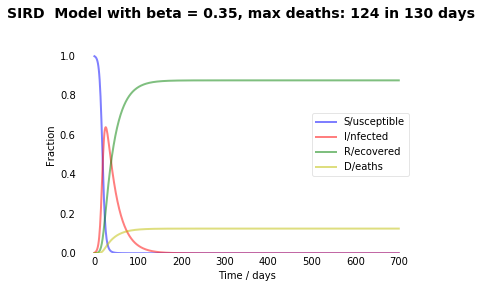

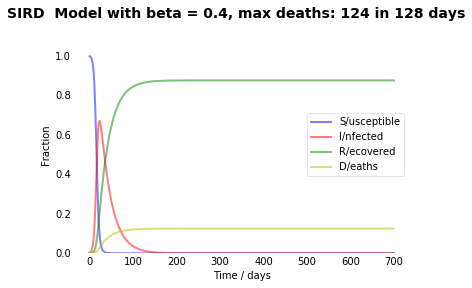

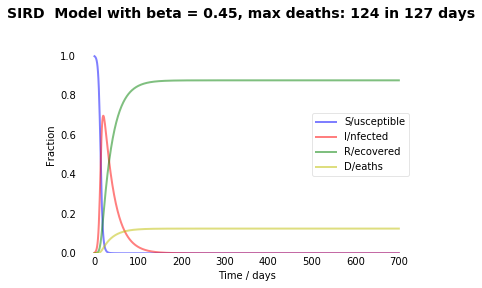

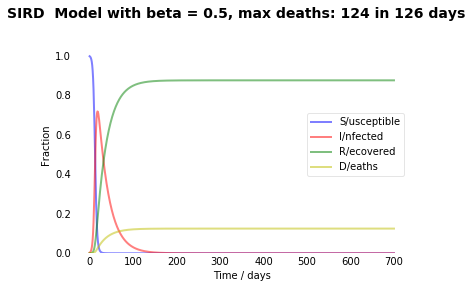

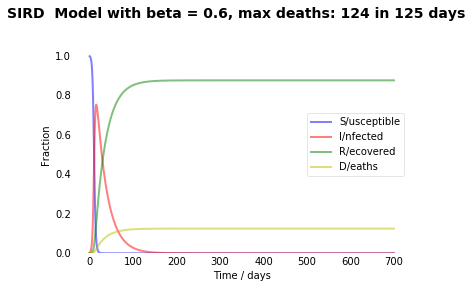

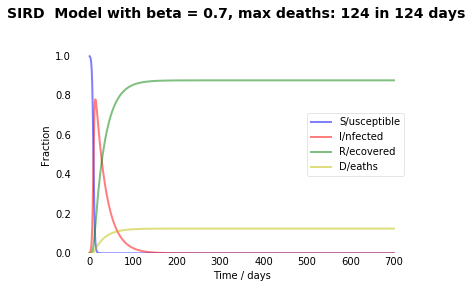

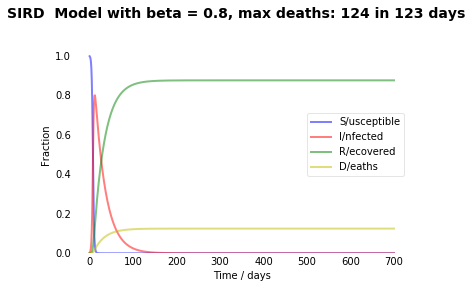

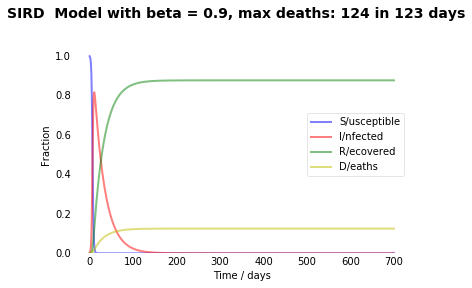

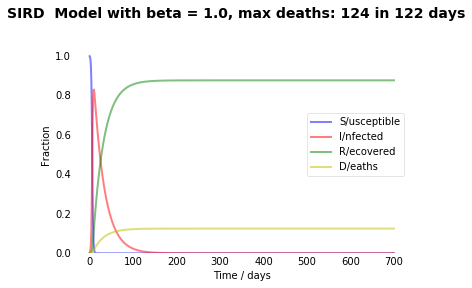

In [27]:
max_deaths = [] #maximum number of deaths at given beta
time_max_deaths = [] #time at which maximum number of deaths reached at given beta
for b in beta:
    # Integrate the SIRD equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N, b, gamma, mu))
    S, I, R, D = ret.T # return vector
    data = D.astype(int)
    data = np.trim_zeros(data)
    max_deaths.append(max(data))
    time_max_deaths.append(np.argmax(data))
    plot_SIRD(S, I, R, D, t, max(data), np.argmax(data), b)
  


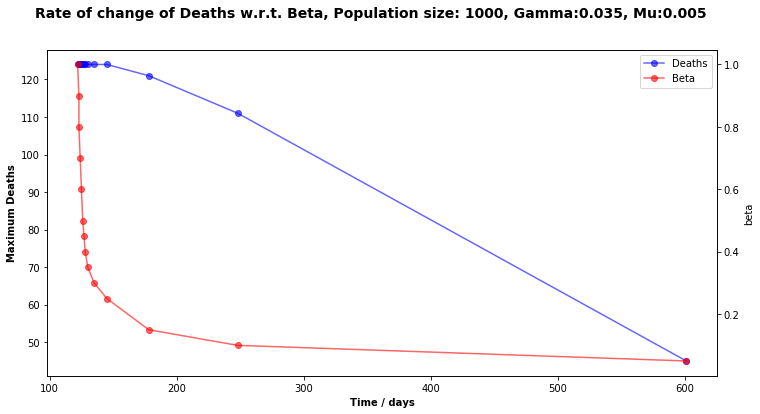

In [28]:
fig = plt.figure(facecolor='w', figsize=(12, 6))
fig.suptitle('Rate of change of Deaths w.r.t. Beta' +', Population size: '+ str(N) +', Gamma:'+str(gamma)+', Mu:'+str(mu), 
             fontsize=14, fontweight='bold')

ax = fig.add_subplot(111, axisbelow=True)

D_line = ax.plot(time_max_deaths, max_deaths, 'b', alpha=0.6, color="blue", marker="o", label ='Deaths')
ax.set_xlabel('Time / days', fontweight='bold')
ax.set_ylabel('Maximum Deaths', fontweight='bold')


# twin object for two different y-axis on the sample plot for beta
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
B_line = ax2.plot(np.array(time_max_deaths), beta, alpha=0.6, color="red",marker="o", label='Beta')
ax2.set_ylabel("beta")


#Plot legend
lns = D_line + B_line
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

plt.show()

### We can see that as Beta decreases, the time it takes to reach maximim number of deaths increases. Keeping in mind that with Beta decreasing the maximum number of deaths also decreases.  Hence we can say that lockdown can have a positive effect as it can reduce the maximum deaths and increase the time it takes to reach maximium deaths. 

# (b) Assume that the basic reproduction number R0 is not exactly knownbut only the range R0 ∈ [1.1, 6.0]. Assume that the mortality rate µ is also not exactly known but only the range µ ∈ [0.1%, 4%]. Study numerically how these parameter uncertainties affect the longterm prediction of D? Your choice how systematic you do this.

### Beta = contact Rate
### Gamma = Recovery Rate
### mu = Death Rate
### R_nought = beta / (gamma + mu)

In [73]:
beta = 0.1 #keeping beta constant
gamma= 0.0157 #keeping gamma constant
mu = [0.001, 0.009, 0.01, 0.02, 0.035, 0.04]

In [74]:
R_naught = []
for i in range(len(mu)):
    R_0 = round(beta / (gamma + mu[i]), 3)
    R_naught.append(R_0)
R_naught

[5.988, 4.049, 3.891, 2.801, 1.972, 1.795]

In [75]:
t = np.linspace(0, 700, 700)

In [76]:
data = [] #to store the number of deaths
for m in mu:
    # Integrate the SIRD equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N, beta, gamma, m))
    S, I, R, D = ret.T # return vector
    d = D.astype(int)
    data.append((d))
    #plot_SIRD(S, I, R, D, t, max(data), np.argmax(data))

In [77]:
def plot_SIRD(D, t, gamma, mu, beta, R_naught, Pop_size):
    # Plot the data on three separate curves for S(t), I(t) and R(t)
    fig = plt.figure(facecolor='w', figsize=(12, 6))
    fig.suptitle('Rate of change of Deaths' +
                 ', Population size: '+ str(Pop_size) +
                 ', Gamma:'+str(gamma)+
                 ', Mu:'+str(mu)+
                 ', beta:'+str(beta)+
                 ', R_naught:'+str(R_naught), 
             fontsize=14, fontweight='bold')


    ax = fig.add_subplot(111, axisbelow=True)
    ax.plot(t, D/N, 'r', alpha=0.5, lw=2, label='D/eaths')
    ax.set_xlabel('Time / days')
    ax.set_ylabel('Fraction')
    ax.set_ylim(0,0.6)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)

plt.show()

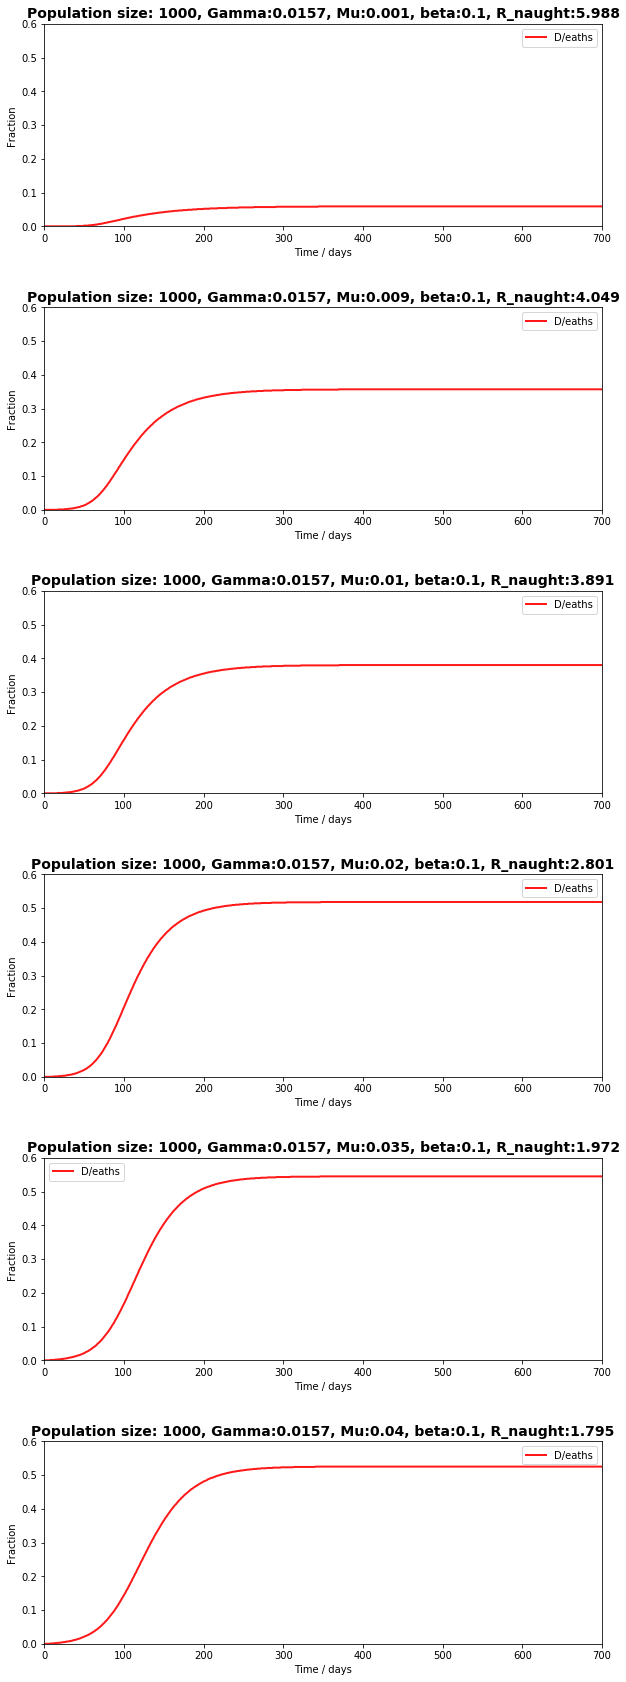

In [78]:
plt.figure(figsize=(10, 25))
#plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05, hspace=.01)
plot_num = 1

for i in range(len(data)):
    plt.subplot(len(data),len(data)/len(data), plot_num)
    plt.title('Population size: '+ str(N) +
              ', Gamma:'+str(gamma)+
              ', Mu:'+str(mu[i])+
              ', beta:'+str(beta)+
              ', R_naught:'+str(R_naught[i]), 
              fontsize=14, fontweight='bold')
    
    plt.subplots_adjust(bottom=.05, top=.95, hspace=.4)
    plt.plot(t, data[i]/N, 'r', alpha=0.9, lw=2, label='D/eaths')
    plt.xlabel('Time / days')
    plt.ylabel('Fraction')
    plt.xlim(0, 700)
    plt.ylim(0, 0.6)
    plt.legend()
    #increase subplot index
    plot_num += 1    
    

### With increasing Mu(Death rate), R_naught is decreasing, The pandamic is slowing down. The fraction of infected people who will die icreases uptill approx (death rate = 0.035), then the max deaths decreases, because there is an increase in the number of infected people who will die.